# HR Analytics - Predict Employee Attrition

This notebook walks through the process of predicting employee attrition using the IBM HR Analytics dataset.

**Steps:**
1. Import Libraries
2. Load Dataset
3. Data Cleaning & Preprocessing
4. Exploratory Data Analysis (EDA)
5. Train-Test Split
6. Model Training
7. Model Evaluation
8. Model Explainability with SHAP
9. Export Processed Data for Power BI


In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import shap


In [2]:
from google.colab import files
import io
import pandas as pd

# Upload file
uploaded = files.upload()

# Load the uploaded file dynamically
for filename in uploaded.keys():
    print("Uploaded file:", filename)
    df = pd.read_csv(io.BytesIO(uploaded[filename]))

df.head()


Saving WA_Fn-UseC_-HR-Employee-Attrition (2).csv to WA_Fn-UseC_-HR-Employee-Attrition (2).csv
Uploaded file: WA_Fn-UseC_-HR-Employee-Attrition (2).csv


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# 3. Data Cleaning & Preprocessing
print(df.isnull().sum())

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Exclude 'Attrition' from scaling
num_cols = df.select_dtypes(include=['int64','float64']).columns
num_cols = num_cols.drop('Attrition', errors='ignore') # Ensure 'Attrition' is not in the list

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,1,0.590048,0.742527,1.401512,-1.010909,-0.891688,-0.937414,0.0,-1.701283,...,-1.584178,0.0,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,0,-0.913194,-1.297775,-0.493817,-0.147150,-1.868426,-0.937414,0.0,-1.699621,...,1.191438,0.0,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1,0.590048,1.414363,-0.493817,-0.887515,-0.891688,1.316673,0.0,-1.696298,...,-0.658973,0.0,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,0,-0.913194,1.461466,-0.493817,-0.764121,1.061787,-0.937414,0.0,-1.694636,...,0.266233,0.0,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,0,0.590048,-0.524295,-0.493817,-0.887515,-1.868426,0.565311,0.0,-1.691313,...,1.191438,0.0,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227


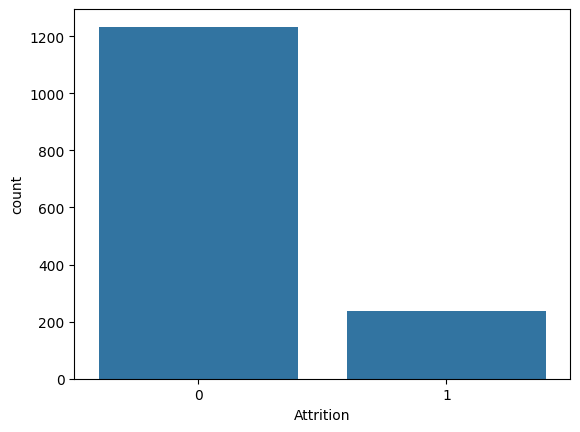

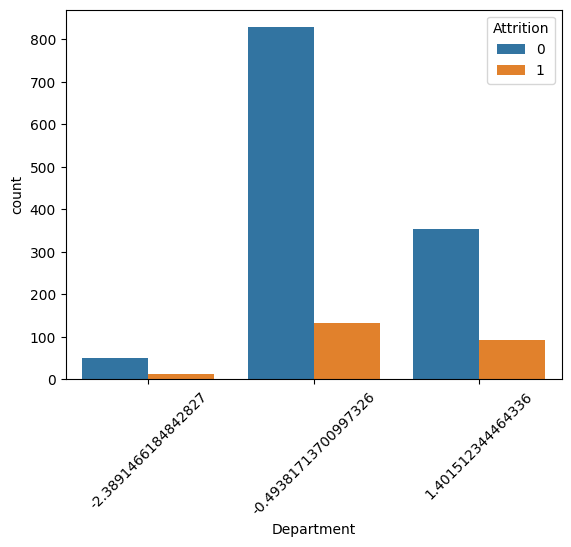

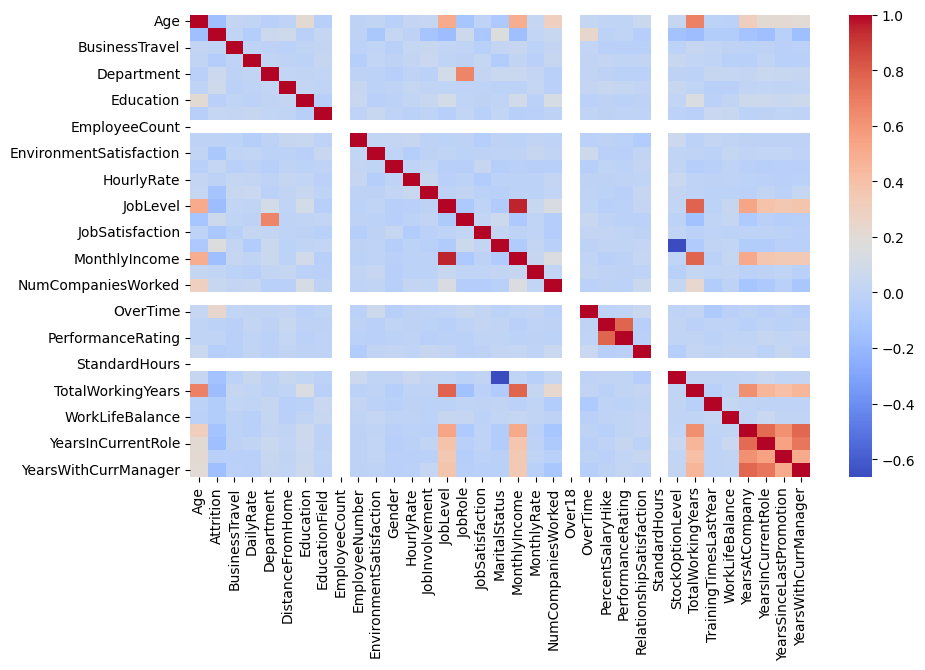

In [4]:
# 4. Exploratory Data Analysis (EDA)
sns.countplot(x='Attrition', data=df)
plt.show()

sns.countplot(x='Department', hue='Attrition', data=df)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()

In [5]:
# 5. Train-Test Split
X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# 6. Model Training
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# 7. Model Evaluation
models = {'Logistic Regression': log_model, 'Decision Tree': tree_model, 'Random Forest': rf_model}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f'--- {name} ---')
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('Classification Report:\n', classification_report(y_test, y_pred))


--- Logistic Regression ---
Accuracy: 0.891156462585034
Confusion Matrix:
 [[249   6]
 [ 26  13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       255
           1       0.68      0.33      0.45        39

    accuracy                           0.89       294
   macro avg       0.79      0.65      0.69       294
weighted avg       0.88      0.89      0.87       294

--- Decision Tree ---
Accuracy: 0.8299319727891157
Confusion Matrix:
 [[238  17]
 [ 33   6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       255
           1       0.26      0.15      0.19        39

    accuracy                           0.83       294
   macro avg       0.57      0.54      0.55       294
weighted avg       0.80      0.83      0.81       294

--- Random Forest ---
Accuracy: 0.8673469387755102
Confusion Matrix:
 [[251   4]
 [ 35   4]]
Classification

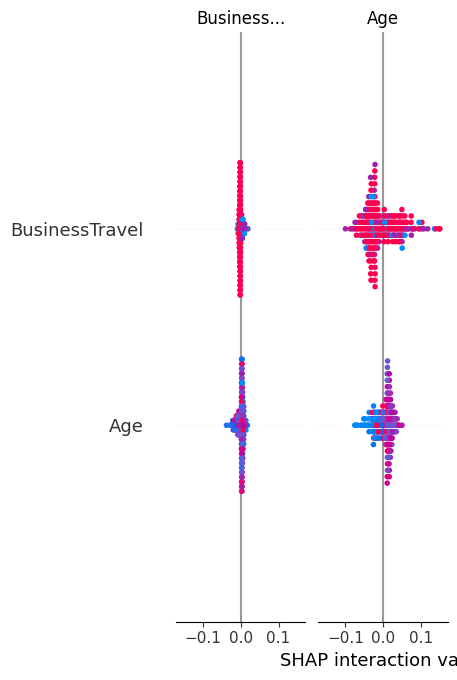

In [8]:
# 8. Model Explainability with SHAP (Random Forest)
explainer = shap.TreeExplainer(rf_model)
# Calculate SHAP values, specifying the target variable
shap_values = explainer.shap_values(X_test, y=y_test)

# For binary classification, if shap_values is a list,
# we plot the SHAP values for the positive class (class 1).
# Otherwise, we plot the single array of SHAP values.
if isinstance(shap_values, list):
  shap.summary_plot(shap_values[1], X_test)
else:
  shap.summary_plot(shap_values, X_test)

In [9]:
# 9. Export processed dataset for Power BI
df.to_csv('processed_hr_data.csv', index=False)
files.download('processed_hr_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>